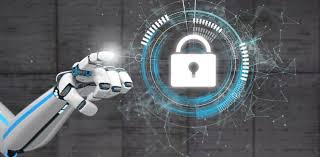

<h2> Introduction</h2>

> With the non linear increase in network architectures and devices, vulnerabilities also start exploiting. Nowadays, we require more robust techniques that can easily detect and prevent malicious attacks to devices. 

> In this project, we have utilized machine learning approach to detect different kinds of attacks based different features of a network.

With the advancements and democratization of computer networks in the past decade, network architectures and topologies have vastly diversified. The non-linear growth of networks like wireless sensor networks and ad-hoc networks have made self-sustaining networks that may or may not be connected to the outside world. This is especially true for IOT networks [1]. Due to the increase in number and the types of attacks, security has become important than ever [2]. Network Intrusion Detection System (NIDS) detects the abnormalities in the network before any malicious activity is happened. It constantly monitors all the traffic in the networks for any unusual, fluctuating and abnormal traffic. 




<h2>Challenges</h2>

<h2> Data Description</h2>

<h2>Procedure</h2>

> Proposed solution to solve the problem involves exploratory data analysis to identify key predictors and machine learning models to automate the process of defaulter prediction. Following is flow of the project with proposed methodologies to be used in project:

> 1. Exploratory data analysis
	- Numerical summary and visualization plots (Box plot,correlation plot)
 
> 2. Data pre-processing
    - Normalization to scaledown all the values in range of 0-1.

> 3. Feature selection/dimensionality reduction
    - Random forest
    - PCA (Principal Component Analysis)

> 4. Classification modelling
    - Logistic Regression
    - Naïve Bayes
    - SVM
    - Decision Tree
    - Random Forest
    - Gradient Boost
    - Neural network

> 5. Model selection
    - Hyper parameter tuning
    - Cross Validation

> 6. Model evaluation
    - Accuracy, Precision, Recall, F1-Score

### Mount drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


### Import libraries

In [ ]:
import sys
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt # plots
import seaborn as sns ## generates enhanced plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,recall_score,precision_score,f1_score,
    plot_confusion_matrix, plot_roc_curve
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.decomposition import PCA
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn.naive_bayes import GaussianNB

In [ ]:
main_path = "/content/gdrive/My Drive/Data Science for security/Data/MachineLearningCVE"
os.chdir(main_path)

### Data import

In [ ]:
Data = pd.DataFrame()

In [ ]:
# Reads all csv files and appends it into dataframe

for x in os.listdir():
    if x.endswith(".csv"):
        # Prints only text file present in My Folder
        data = pd.read_csv(x)
        Data = Data.append(data,ignore_index=True)

# **Exploratory data analysis**

### Data snapshot

In [ ]:
Data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### Data shape

In [ ]:
print("No. of rows:", Data.shape[0])
print("No. of columns:", Data.shape[1])

No. of rows: 2830743
No. of columns: 79


### Data types of features

In [ ]:
Data.dtypes

 Destination Port                 int64
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max             int64
 Bwd Packet Length Min            int64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                     int64
 Flow IAT Min                     int64
Fwd IAT Total                     int64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64
 Fwd IAT Max                      int64
 Fwd IAT Min                      int64


#### **All independent features consists of integer and float**

### Missing values

In [ ]:
pd.set_option('display.max_rows', 79)
Data.isnull().sum()

 Destination Port                  0
 Flow Duration                     0
 Total Fwd Packets                 0
 Total Backward Packets            0
Total Length of Fwd Packets        0
 Total Length of Bwd Packets       0
 Fwd Packet Length Max             0
 Fwd Packet Length Min             0
 Fwd Packet Length Mean            0
 Fwd Packet Length Std             0
Bwd Packet Length Max              0
 Bwd Packet Length Min             0
 Bwd Packet Length Mean            0
 Bwd Packet Length Std             0
Flow Bytes/s                    1358
 Flow Packets/s                    0
 Flow IAT Mean                     0
 Flow IAT Std                      0
 Flow IAT Max                      0
 Flow IAT Min                      0
Fwd IAT Total                      0
 Fwd IAT Mean                      0
 Fwd IAT Std                       0
 Fwd IAT Max                       0
 Fwd IAT Min                       0
Bwd IAT Total                      0
 Bwd IAT Mean                      0
 

#### **Flow bytes has 1358 missing values, which are missing completely at random. Missing values are due to technical fault during data aqcuisition.**

In [ ]:
# Replace withj median, so that data does not get skewed.
Data['Flow Bytes/s']=Data['Flow Bytes/s'].fillna(Data['Flow Bytes/s'].median())

### Data description

In [ ]:
pd.get_option("display.max_columns")
Data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


### Dependent feature

In [ ]:
Data[' Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

### **There are 13 different types attacks and 1 benign flow. Total 14 classes.**

### Boxplot

In [ ]:
col_list = list(Data.columns)
col_list = col_list[:-1]

In [ ]:
for col in col_list:
  plt.figure(figsize=(30, 25))
  Data.boxplot(by =' Label', column =col, figsize = (30,25), grid = False)
  plt.plot()


Output hidden; open in https://colab.research.google.com to view.

#### **1. Among all classes, benign has a lot of outliers for all features.**
#### **2. DDOS, DOS goldeneye, DOS hulk, DOS slowhttprequest, DOS slowloris have values scattered over long range of values compared to other classes for most of the features.**

### Correlation Matrix

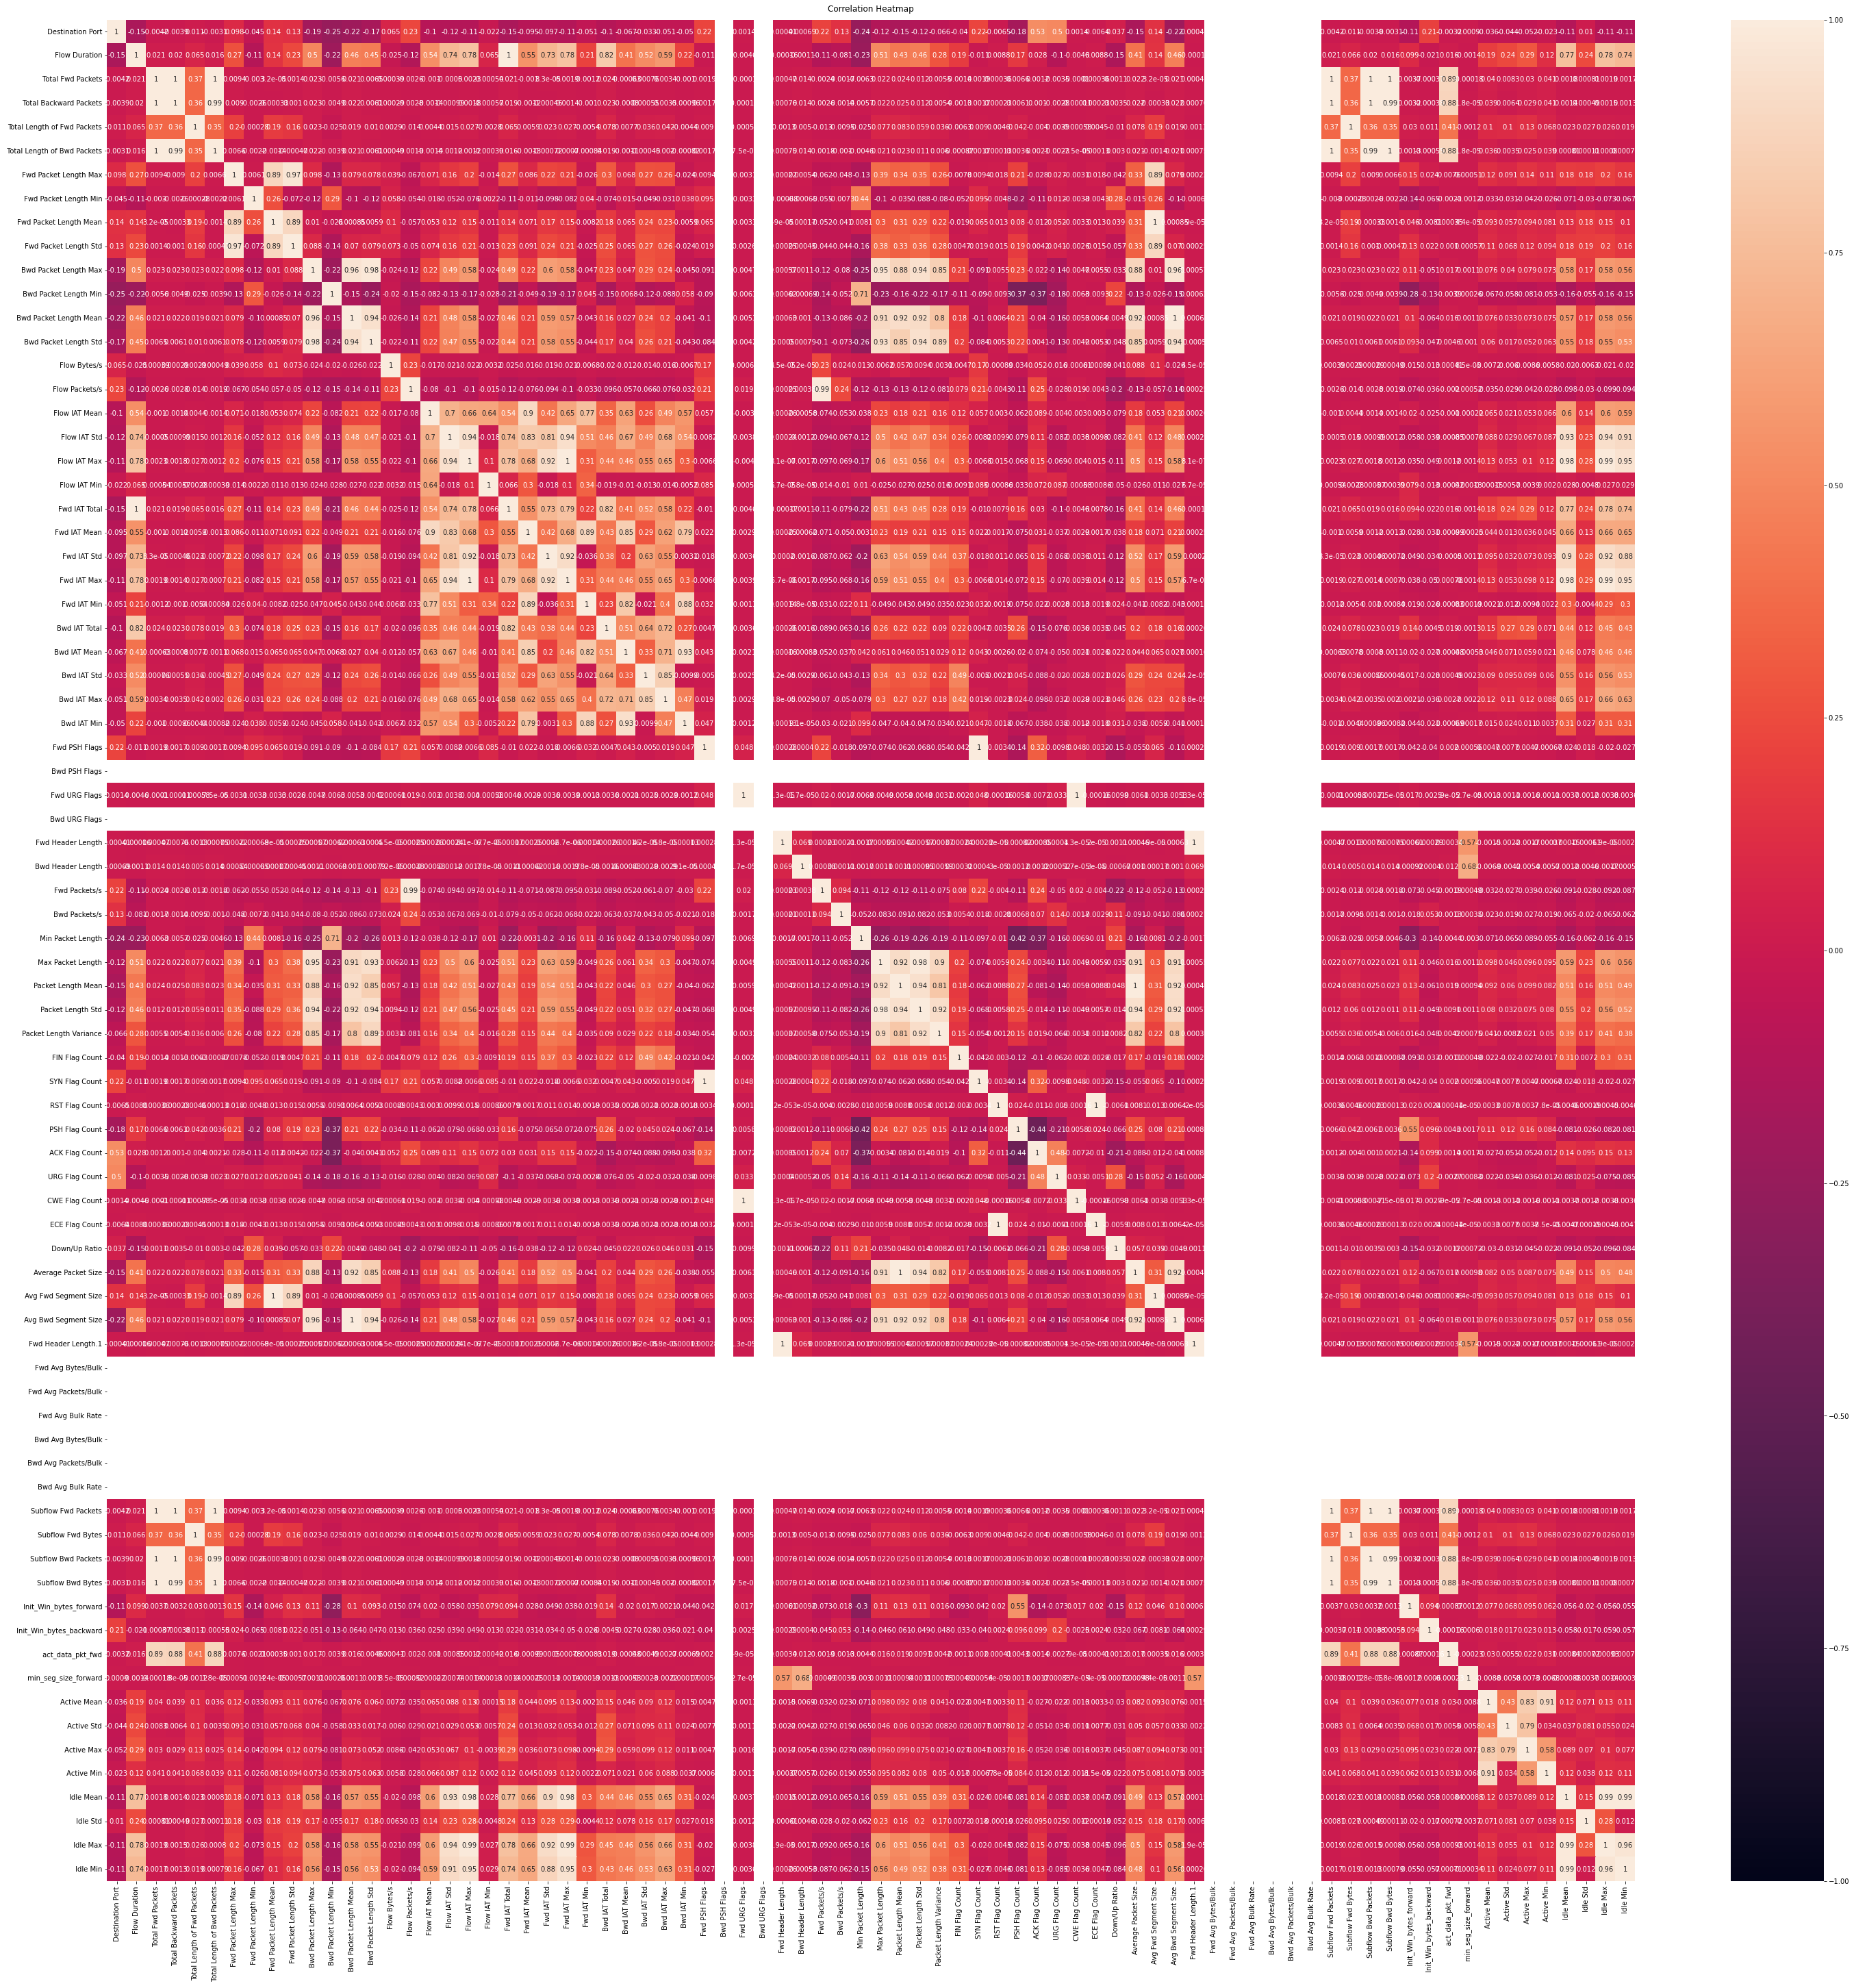

In [ ]:
# Heatmap
plt.figure(figsize=(50, 50))
heatmap = sns.heatmap(Data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### **1. Max packet length and packet Length std have coorelation 0.98**
#### **2. Fwd Packets/s and flow packets/s have coorelation 0.99**

#### **3. Avg bwd segment size and bwd packet length mean have coorelation 0.96**

#### **4. Fwd Packets/s and flow packets/s have coorelation 0.99**

# **Data Pre-processing**

In [ ]:
# Seperating independent and dependent features
col_list = list(Data.columns)
col_list = col_list[:-1]

# Independent features
X = Data[col_list]

# Dependent feature
y = Data[' Label']

In [ ]:
# Replace Infinity with 0
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
# Normalization of independent features
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# label encoding of dependent feature
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
y_std = label_encoder.fit_transform(y)


# **Train-Test Split**

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=42)

In [ ]:
# Number of attacks in Train set
y_train.value_counts()

BENIGN                        1818145
DoS Hulk                       184919
PortScan                       127190
DDoS                           102535
DoS GoldenEye                    8305
FTP-Patator                      6339
SSH-Patator                      4735
DoS slowloris                    4648
DoS Slowhttptest                 4397
Bot                              1593
Web Attack � Brute Force         1213
Web Attack � XSS                  520
Infiltration                       29
Web Attack � Sql Injection         18
Heartbleed                          8
Name:  Label, dtype: int64

In [ ]:
# Number of attacks in Test set
y_test.value_counts()

BENIGN                        454952
DoS Hulk                       46154
PortScan                       31740
DDoS                           25492
DoS GoldenEye                   1988
FTP-Patator                     1599
SSH-Patator                     1162
DoS slowloris                   1148
DoS Slowhttptest                1102
Bot                              373
Web Attack � Brute Force         294
Web Attack � XSS                 132
Infiltration                       7
Web Attack � Sql Injection         3
Heartbleed                         3
Name:  Label, dtype: int64

# **Feature Selection/Dimesionality reduction**

# Random forest (feature importance)

In [ ]:
# Train Model for feature importance

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

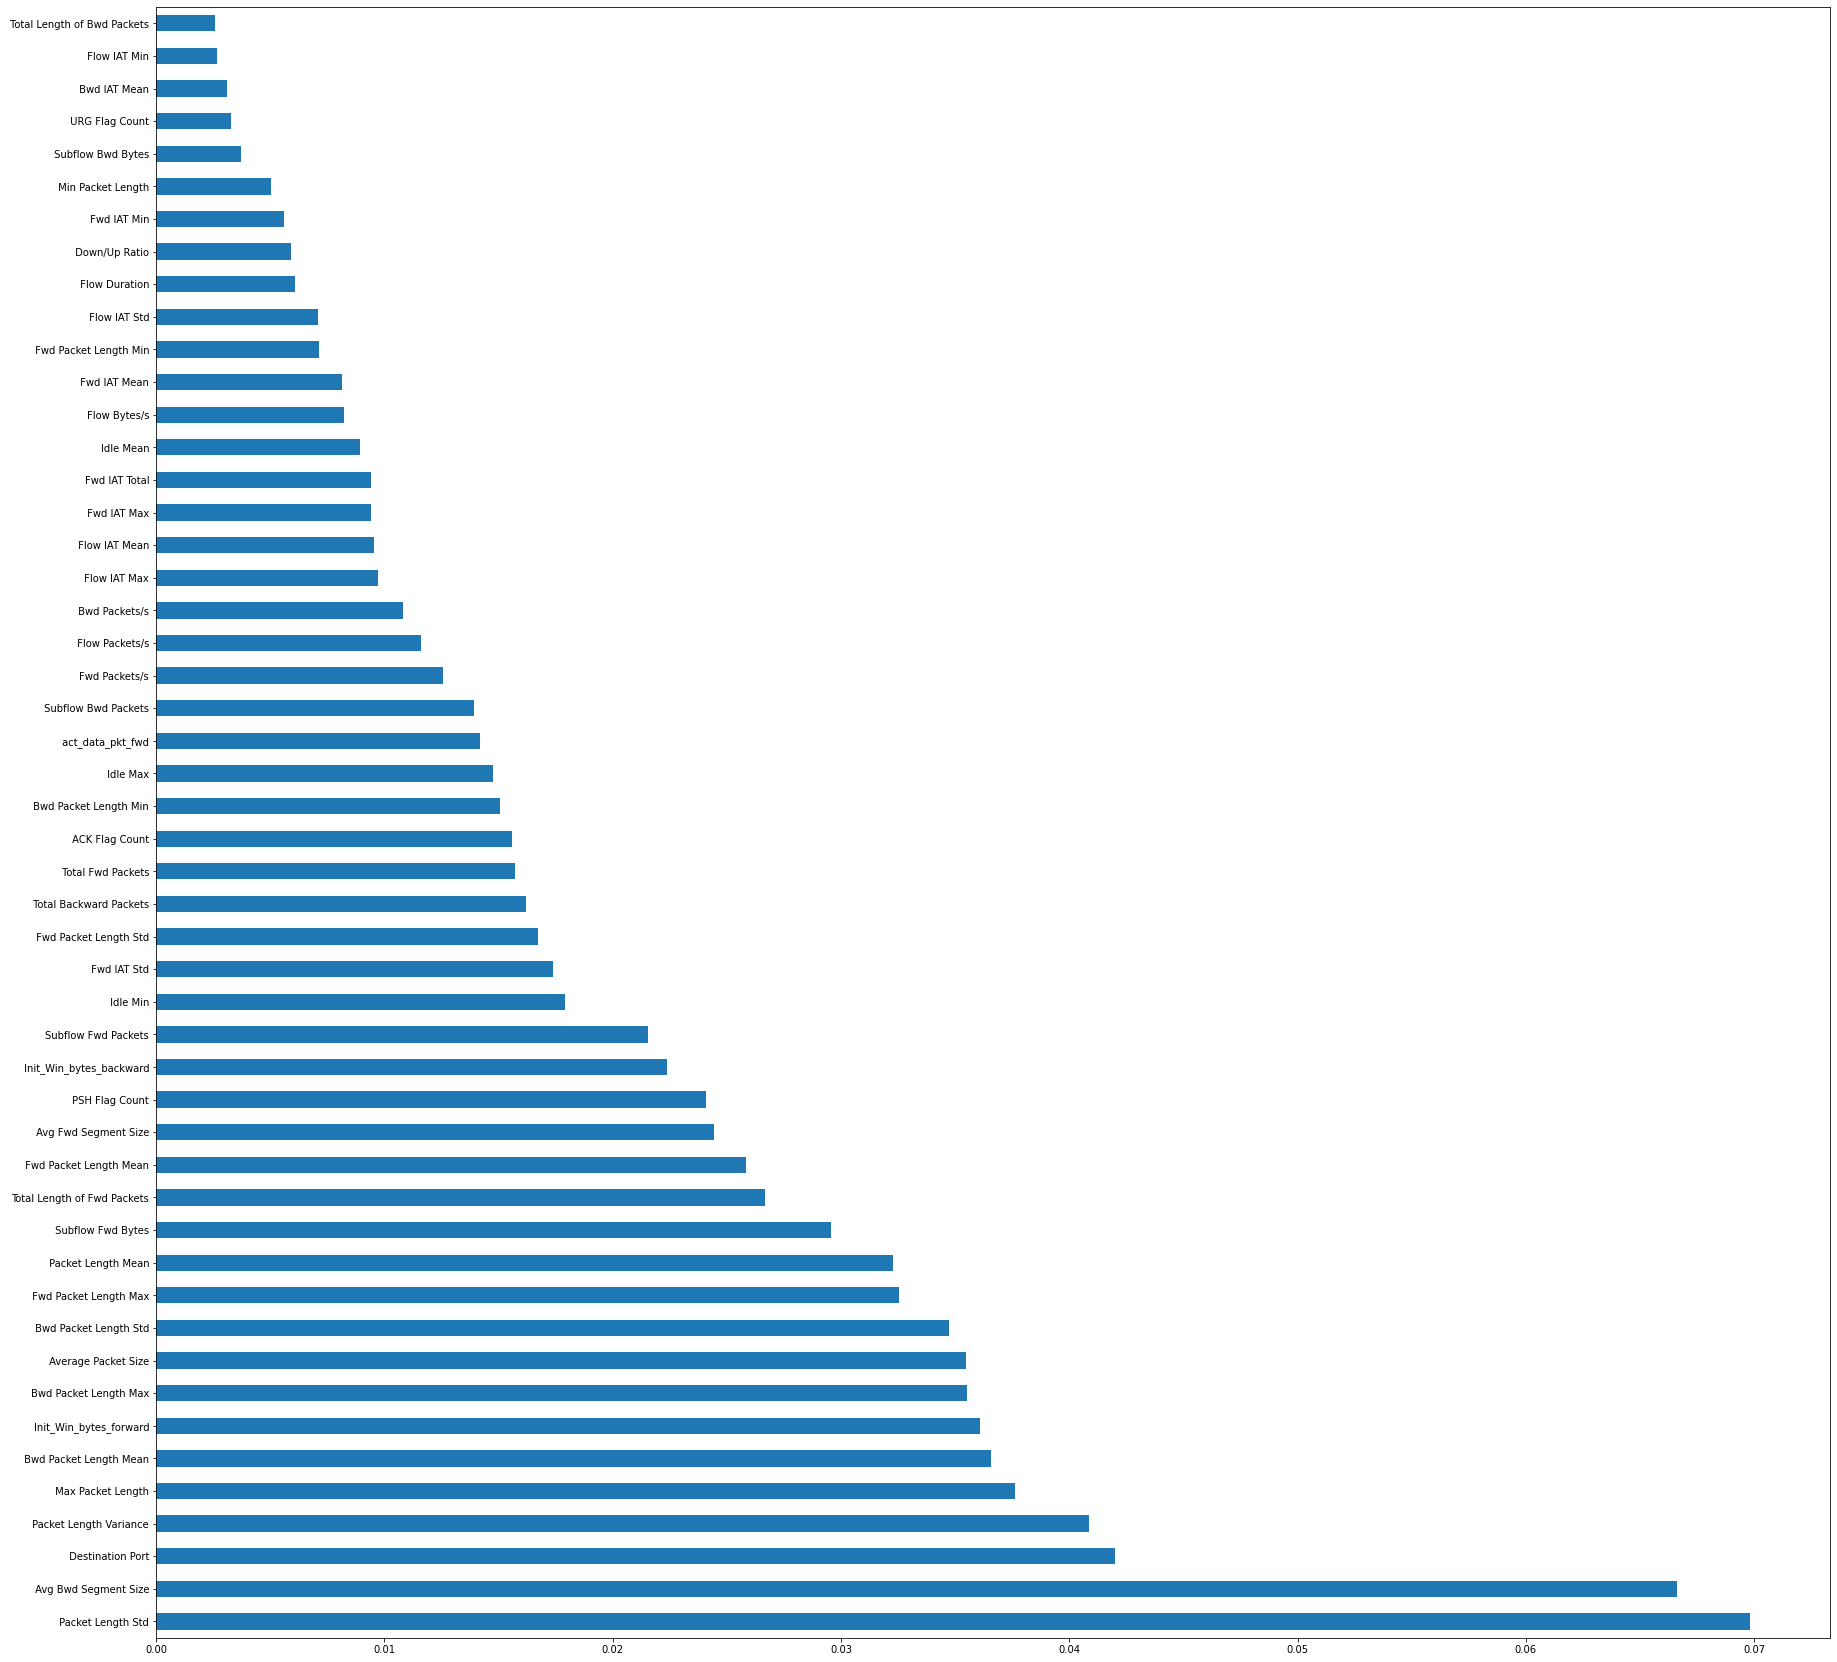

In [ ]:
plt.figure(figsize=(30,30))
ranked_features=pd.Series(rfc.feature_importances_,index=X.columns)
ranked_features.nlargest(50).plot(kind='barh')
plt.show()

#### **Using random forest for feature selection, we are considering top 20 features for model training.**

#### **Top 3 features:**
##### 1. Packet Length std
##### 2. Avg Bwd Segment size
##### 3. Destination port

# Principal Component Analysis

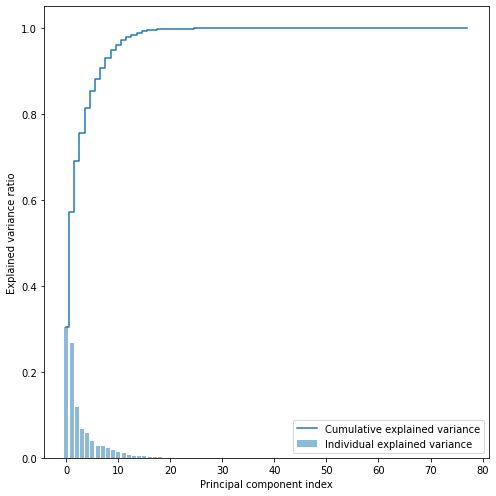

In [ ]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.figure(figsize=(7, 7))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### **With explained variance 98-99%, we have 15 principal components that can be used for model training.**

#### Now, we will train models based on principal components and features extracted by random forest.

# **Model Training** 
### (Top 20 features extracted from random forest)

In [ ]:
columns=[' Packet Length Std',' Avg Bwd Segment Size',' Destination Port',' Packet Length Variance',' Max Packet Length',' Bwd Packet Length Mean','Init_Win_bytes_forward','Bwd Packet Length Max',' Average Packet Size',' Bwd Packet Length Std',' Fwd Packet Length Max',' Packet Length Mean',' Subflow Fwd Bytes','Total Length of Fwd Packets',' Fwd Packet Length Mean',' Avg Fwd Segment Size',' PSH Flag Count',' Init_Win_bytes_backward','Subflow Fwd Packets',' Idle Min']
X_train_1 = pd.DataFrame(X_train,columns=col_list)
X_train_1 = X_train_1[columns]



In [ ]:
X_test_1 = pd.DataFrame(X_test,columns=col_list)
X_test_1 = X_test_1[columns]

# Logistic Regression

In [ ]:
# Building a model
clf = LogisticRegression()
clf = clf.fit(X_train_1,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:

# Predict on train data
y_pred_train = clf.predict(X_train_1)


# Predict on Test Data
y_pred_test = clf.predict(X_test_1)

In [ ]:
# Classification metrics

result = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for train data:")
print(result)

result1 = classification_report(y_train, y_pred_train)
print("Classification Report for train data:",)
print (result1)


result = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for test data:")
print(result)

result1 = classification_report(y_test, y_pred_test)
print("Classification Report for test data:",)
print (result1)


Confusion Matrix for train data:
[[1755199     417    1522    1181     636      78       0       0       0
        0   59093       0       0       0      19]
 [   1195       0       0       0       0       0       0       0       0
        0     398       0       0       0       0]
 [  37648       0   59383       0    5493       0       0       0       0
        0      11       0       0       0       0]
 [   3078       0       0    4427     800       0       0       0       0
        0       0       0       0       0       0]
 [  63958       0    2037      32  118835       0       0       0       0
        0      57       0       0       0       0]
 [   3386       0       3       1     214     779       0       0       0
        0      14       0       0       0       0]
 [   3187       0       0       1      51      93       0       0       0
        0    1316       0       0       0       0]
 [   3159       0       0       0       0       0       0       0       0
        0    3180 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for train data:
                            precision    recall  f1-score   support

                    BENIGN       0.93      0.97      0.95   1818145
                       Bot       0.00      0.00      0.00      1593
                      DDoS       0.94      0.58      0.72    102535
             DoS GoldenEye       0.78      0.53      0.63      8305
                  DoS Hulk       0.94      0.64      0.76    184919
          DoS Slowhttptest       0.80      0.18      0.29      4397
             DoS slowloris       0.00      0.00      0.00      4648
               FTP-Patator       0.00      0.00      0.00      6339
                Heartbleed       0.00      0.00      0.00         8
              Infiltration       0.00      0.00      0.00        29
                  PortScan       0.66      0.99      0.79    127190
               SSH-Patator       0.00      0.00      0.00      4735
  Web Attack � Brute Force       0.00      0.00      0.00      1213
Web Attac

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for test data:
                            precision    recall  f1-score   support

                    BENIGN       0.93      0.97      0.95    454952
                       Bot       0.00      0.00      0.00       373
                      DDoS       0.94      0.58      0.72     25492
             DoS GoldenEye       0.79      0.55      0.65      1988
                  DoS Hulk       0.94      0.64      0.76     46154
          DoS Slowhttptest       0.84      0.18      0.30      1102
             DoS slowloris       0.00      0.00      0.00      1148
               FTP-Patator       0.00      0.00      0.00      1599
                Heartbleed       0.00      0.00      0.00         3
              Infiltration       0.00      0.00      0.00         7
                  PortScan       0.66      0.99      0.79     31740
               SSH-Patator       0.00      0.00      0.00      1162
  Web Attack � Brute Force       0.00      0.00      0.00       294
Web Attack

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes

In [ ]:
# Building a model
clf = GaussianNB()
clf = clf.fit(X_train_1,y_train)

In [ ]:

# Predict on train data
y_pred_train = clf.predict(X_train_1)


# Predict on Test Data
y_pred_test = clf.predict(X_test_1)

In [ ]:
# Classification metrics

result = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for train data:")
print(result)

result1 = classification_report(y_train, y_pred_train)
print("Classification Report for train data:",)
print (result1)


result = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for test data:")
print(result)

result1 = classification_report(y_test, y_pred_test)
print("Classification Report for test data:",)
print (result1)

Confusion Matrix for train data:
[[1054422  481385   39936   11305    7398   45313   67520    5182      38
      296   62845    7517   30127    4806      55]
 [     84    1111       0       0       0       0       0       0       0
        0     398       0       0       0       0]
 [      1       0   64043      68    1149       0   37274       0       0
        0       0       0       0       0       0]
 [     23       0       0    5526       0      76    2310       0       0
        0       2       0       0     368       0]
 [      0       0       0   13947  109992       0   60902       0       0
        0      57       0       2      19       0]
 [    162       0       0       1       1     474    1138       0       0
        0    2248       0     145     228       0]
 [      0       0       0       3       0       2    3198       0       0
        0    1317       0      25     103       0]
 [      0       0       0       0       0       0       0    6333       0
        0       0 

# Decision Tree

In [ ]:
# Building a model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_1,y_train)

In [ ]:

# Predict on train data
y_pred_train = clf.predict(X_train_1)


# Predict on Test Data
y_pred_test = clf.predict(X_test_1)

In [ ]:
# Classification metrics

result = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for train data:")
print(result)

result1 = classification_report(y_train, y_pred_train)
print("Classification Report for train data:",)
print (result1)


result = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for test data:")
print(result)

result1 = classification_report(y_test, y_pred_test)
print("Classification Report for test data:",)
print (result1)

Confusion Matrix for train data:
[[1816556       0      18       1     752      29       1       0       0
        0     770       0      18       0       0]
 [    399    1194       0       0       0       0       0       0       0
        0       0       0       0       0       0]
 [     25       0  102489       0      21       0       0       0       0
        0       0       0       0       0       0]
 [      0       0       0    8226      77       2       0       0       0
        0       0       0       0       0       0]
 [      2       0       0       1  184916       0       0       0       0
        0       0       0       0       0       0]
 [     13       0       0       0       0    4356      28       0       0
        0       0       0       0       0       0]
 [     13       0       0       0       0       1    4634       0       0
        0       0       0       0       0       0]
 [     15       0       0       0       0       0       0    6324       0
        0       0 

# Random Forest

In [ ]:
# Building a model
clf = RandomForestClassifier()
clf = clf.fit(X_train_1,y_train)

In [ ]:

# Predict on train data
y_pred_train = clf.predict(X_train_1)


# Predict on Test Data
y_pred_test = clf.predict(X_test_1)

In [ ]:
# Classification metrics

result = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for train data:")
print(result)

result1 = classification_report(y_train, y_pred_train)
print("Classification Report for train data:",)
print (result1)


result = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for test data:")
print(result)

result1 = classification_report(y_test, y_pred_test)
print("Classification Report for test data:",)
print (result1)

Confusion Matrix for train data:
[[1816552       0      18       1     752      29       5       0       0
        0     770       0      18       0       0]
 [    399    1194       0       0       0       0       0       0       0
        0       0       0       0       0       0]
 [     25       0  102489       0      21       0       0       0       0
        0       0       0       0       0       0]
 [      0       0       0    8226      77       2       0       0       0
        0       0       0       0       0       0]
 [      2       0       0       1  184916       0       0       0       0
        0       0       0       0       0       0]
 [     10       0       0       0       0    4356      31       0       0
        0       0       0       0       0       0]
 [      9       0       0       0       0       1    4638       0       0
        0       0       0       0       0       0]
 [     15       0       0       0       0       0       0    6324       0
        0       0 

# Gradient Boost

In [ ]:
# Building a model
clf = GradientBoostingClassifier()
clf = clf.fit(X_train_1,y_train)

In [ ]:
# Predict on train data
y_pred_train = clf.predict(X_train_1)


# Predict on Test Data
y_pred_test = clf.predict(X_test_1)

In [ ]:
# Classification metrics

result = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for train data:")
print(result)

result1 = classification_report(y_train, y_pred_train)
print("Classification Report for train data:",)
print (result1)


result = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for test data:")
print(result)

result1 = classification_report(y_test, y_pred_test)
print("Classification Report for test data:",)
print (result1)

Confusion Matrix for train data:
[[1462263     148      18     174     947    1087       8    1465       0
        0    1358       8      12  221954  128703]
 [    556     979       0       0       0       0       0       0       0
        0       0       0       0       1      57]
 [     98       0  102437       0       0       0       0       0       0
        0       0       0       0       0       0]
 [    140       0       0    5119      31       0       0       0       0
        0       0       0       0    2106     909]
 [    464       0       8       1  120868      67      41       0       0
        0       0       0       0   52733   10737]
 [    781       0       0       0       1     203       0       0       0
        0       0       0       0    2263    1149]
 [    449       0       0       1       0       8    1329       0       0
        0       0       0       0    1328    1533]
 [      9       0       0       0       0       0       0    6315       0
        0       0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for train data:
                            precision    recall  f1-score   support

                    BENIGN       1.00      0.80      0.89   1818145
                       Bot       0.87      0.61      0.72      1593
                      DDoS       1.00      1.00      1.00    102535
             DoS GoldenEye       0.97      0.62      0.75      8305
                  DoS Hulk       0.99      0.65      0.79    184919
          DoS Slowhttptest       0.15      0.05      0.07      4397
             DoS slowloris       0.96      0.29      0.44      4648
               FTP-Patator       0.70      1.00      0.82      6339
                Heartbleed       1.00      1.00      1.00         8
              Infiltration       0.00      0.00      0.00        29
                  PortScan       0.99      0.98      0.99    127190
               SSH-Patator       0.93      0.50      0.65      4735
  Web Attack � Brute Force       0.00      0.00      0.00      1213
Web Attac

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for test data:
                            precision    recall  f1-score   support

                    BENIGN       1.00      0.80      0.89    454952
                       Bot       0.87      0.62      0.73       373
                      DDoS       1.00      1.00      1.00     25492
             DoS GoldenEye       0.96      0.64      0.76      1988
                  DoS Hulk       0.99      0.65      0.79     46154
          DoS Slowhttptest       0.16      0.05      0.07      1102
             DoS slowloris       0.93      0.27      0.42      1148
               FTP-Patator       0.70      1.00      0.82      1599
                Heartbleed       1.00      1.00      1.00         3
              Infiltration       0.00      0.00      0.00         7
                  PortScan       0.99      0.98      0.99     31740
               SSH-Patator       0.94      0.50      0.65      1162
  Web Attack � Brute Force       0.00      0.00      0.00       294
Web Attack

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Model Training** 
### (15 principal components)

In [ ]:
X_train_2 = pd.DataFrame(X_train,columns=col_list)

pca = PCA(15)

X_train_2 = pca.fit_transform(X_train_2)

In [ ]:
X_test_2 = pca.fit_transform(X_test)

# Logistic Regression

In [ ]:
# Building a model
clf = LogisticRegression()
clf = clf.fit(X_train_2,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:

# Predict on train data
y_pred_train = clf.predict(X_train_2)


# Predict on Test Data
y_pred_test = clf.predict(X_test_2)

In [ ]:
# Classification metrics

result = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for train data:")
print(result)

result1 = classification_report(y_train, y_pred_train)
print("Classification Report for train data:",)
print (result1)


result = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for test data:")
print(result)

result1 = classification_report(y_test, y_pred_test)
print("Classification Report for test data:",)
print (result1)

Confusion Matrix for train data:
[[1760114      30    2216     266    7848     617     803       0       0
        0   46251       0       0       0       0]
 [   1184       0       0       0      11       0       0       0       0
        0     398       0       0       0       0]
 [  21767       0   71735      68    8954       0       0       0       0
        0      11       0       0       0       0]
 [   4139       0       0    2749    1413       0       4       0       0
        0       0       0       0       0       0]
 [  27807       0    2139      86  154827       3      57       0       0
        0       0       0       0       0       0]
 [   3385       0       1       0     117     779     101       0       0
        0      14       0       0       0       0]
 [    901       0       0       0       1     130    2183       0       0
        0    1433       0       0       0       0]
 [   6339       0       0       0       0       0       0       0       0
        0       0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for train data:
                            precision    recall  f1-score   support

                    BENIGN       0.96      0.97      0.96   1818145
                       Bot       0.00      0.00      0.00      1593
                      DDoS       0.94      0.70      0.80    102535
             DoS GoldenEye       0.87      0.33      0.48      8305
                  DoS Hulk       0.89      0.84      0.86    184919
          DoS Slowhttptest       0.51      0.18      0.26      4397
             DoS slowloris       0.68      0.47      0.56      4648
               FTP-Patator       0.00      0.00      0.00      6339
                Heartbleed       0.00      0.00      0.00         8
              Infiltration       0.00      0.00      0.00        29
                  PortScan       0.72      0.98      0.83    127190
               SSH-Patator       0.00      0.00      0.00      4735
  Web Attack � Brute Force       0.00      0.00      0.00      1213
Web Attac

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for test data:
                            precision    recall  f1-score   support

                    BENIGN       0.96      0.97      0.96    454952
                       Bot       0.00      0.00      0.00       373
                      DDoS       0.93      0.57      0.71     25492
             DoS GoldenEye       0.87      0.36      0.51      1988
                  DoS Hulk       0.86      0.84      0.85     46154
          DoS Slowhttptest       0.57      0.17      0.27      1102
             DoS slowloris       0.87      0.45      0.59      1148
               FTP-Patator       0.00      0.00      0.00      1599
                Heartbleed       0.00      0.00      0.00         3
              Infiltration       0.00      0.00      0.00         7
                  PortScan       0.72      0.98      0.83     31740
               SSH-Patator       0.00      0.00      0.00      1162
  Web Attack � Brute Force       0.00      0.00      0.00       294
Web Attack

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes

In [ ]:
# Building a model
clf = GaussianNB()
clf = clf.fit(X_train_2,y_train)

In [ ]:

# Predict on train data
y_pred_train = clf.predict(X_train_2)


# Predict on Test Data
y_pred_test = clf.predict(X_test_2)

In [ ]:
# Classification metrics

result = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for train data:")
print(result)

result1 = classification_report(y_train, y_pred_train)
print("Classification Report for train data:",)
print (result1)


result = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for test data:")
print(result)

result1 = classification_report(y_test, y_pred_test)
print("Classification Report for test data:",)
print (result1)

Confusion Matrix for train data:
[[1420124    7153   11878   25882   46637   27870   31370   28828      16
     8974  144040   46329    3137    2973   12934]
 [    492       6      14       0       3      20       1       0       0
        0     951     106       0       0       0]
 [  37208       0   58791      48    6473       0       4       0       0
        0      11       0       0       0       0]
 [   2753       0    1042    3526     217       2     578       0       0
        0       0      65       0     122       0]
 [  29064       0    4648    9039  141487       4     551       0       0
        0       0     124       0       0       2]
 [    944       0      63       0       0    3025     168      11       0
        0      17      19       0       3     147]
 [    167       0       0       2       0     133    2392     407       0
        0    1441      57       0       0      49]
 [     11       0       0       0       0       0       0    3142       0
        0    3180 

# Decision Tree

In [ ]:
# Building a model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_2,y_train)

In [ ]:
# Predict on train data
y_pred_train = clf.predict(X_train_2)


# Predict on Test Data
y_pred_test = clf.predict(X_test_2)

In [ ]:
# Classification metrics

result = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for train data:")
print(result)

result1 = classification_report(y_train, y_pred_train)
print("Classification Report for train data:",)
print (result1)


result = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for test data:")
print(result)

result1 = classification_report(y_test, y_pred_test)
print("Classification Report for test data:",)
print (result1)

Confusion Matrix for train data:
[[1817831       0       1       0     157       0       0       0       0
        0     156       0       0       0       0]
 [      0    1593       0       0       0       0       0       0       0
        0       0       0       0       0       0]
 [      2       0  102533       0       0       0       0       0       0
        0       0       0       0       0       0]
 [      0       0       0    8305       0       0       0       0       0
        0       0       0       0       0       0]
 [     87       0       0       1  184831       0       0       0       0
        0       0       0       0       0       0]
 [      0       0       0       1       0    4391       5       0       0
        0       0       0       0       0       0]
 [      1       0       0       0       0       2    4645       0       0
        0       0       0       0       0       0]
 [      0       0       0       0       0       0       0    6339       0
        0       0 

# Random Forest

In [ ]:
clf = RandomForestClassifier()
clf = clf.fit(X_train_2,y_train)

In [ ]:
# Predict on train data
y_pred_train = clf.predict(X_train_2)

# Predict on Test Data
y_pred_test = clf.predict(X_test_2)

In [ ]:
# Classification metrics

result = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for train data:")
print(result)

result1 = classification_report(y_train, y_pred_train)
print("Classification Report for train data:",)
print (result1)


result = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for test data:")
print(result)

result1 = classification_report(y_test, y_pred_test)
print("Classification Report for test data:",)
print (result1)

Confusion Matrix for train data:
[[1817604       0       1       0     185       0       0       0       0
        0     355       0       0       0       0]
 [      0    1593       0       0       0       0       0       0       0
        0       0       0       0       0       0]
 [      2       0  102533       0       0       0       0       0       0
        0       0       0       0       0       0]
 [      0       0       0    8303       1       1       0       0       0
        0       0       0       0       0       0]
 [     59       0       0       1  184859       0       0       0       0
        0       0       0       0       0       0]
 [      0       0       0       0       0    4385      12       0       0
        0       0       0       0       0       0]
 [      1       0       0       0       0       0    4646       0       0
        0       0       0       1       0       0]
 [      0       0       0       0       0       0       0    6339       0
        0       0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for test data:
                            precision    recall  f1-score   support

                    BENIGN       0.92      1.00      0.96    454952
                       Bot       1.00      0.38      0.55       373
                      DDoS       0.99      0.83      0.90     25492
             DoS GoldenEye       0.99      0.95      0.97      1988
                  DoS Hulk       1.00      0.67      0.80     46154
          DoS Slowhttptest       1.00      0.32      0.49      1102
             DoS slowloris       0.92      0.42      0.58      1148
               FTP-Patator       1.00      0.49      0.66      1599
                Heartbleed       1.00      1.00      1.00         3
              Infiltration       0.00      0.00      0.00         7
                  PortScan       0.94      0.51      0.66     31740
               SSH-Patator       1.00      0.50      0.66      1162
  Web Attack � Brute Force       1.00      0.06      0.11       294
Web Attack

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting

In [ ]:
# Building a model
clf = GradientBoostingClassifier()
clf = clf.fit(X_train_2,y_train)

In [ ]:
# Predict on train data
y_pred_train = clf.predict(X_train_2)

# Predict on Test Data
y_pred_test = clf.predict(X_test_2)

In [ ]:
# Classification metrics

result = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for train data:")
print(result)

result1 = classification_report(y_train, y_pred_train)
print("Classification Report for train data:",)
print (result1)


result = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for test data:")
print(result)

result1 = classification_report(y_test, y_pred_test)
print("Classification Report for test data:",)
print (result1)